In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import glob
import time
import sys
from skimage.metrics import structural_similarity as ssim
sys.path.append("C:/Users/Alexandre/Documents/GitHub/")
sys.path.append("C:/Users/agarcia/Documents/GitHub/custom_utils")  # Alex CRM
import utilsJ
from utilsJ.Behavior.plotting import binned_curve, tachometric, psych_curve
from utilsJ.Models import extended_ddm as exddm
from utilsJ.Models import extended_ddm_v2 as exddmv2

# SV_FOLDER = '/home/molano/Dropbox/project_Barna/ChangesOfMind/'  # Manuel
# SV_FOLDER = 'C:/Users/Alexandre/Desktop/CRM/Alex/paper'  # Alex
# SV_FOLDER = '/home/jordi/DATA/Documents/changes_of_mind/'  # Jordi
# DATA_FOLDER = '/home/molano/ChangesOfMind/data/'  # Manuel
SV_FOLDER = 'C:/Users/agarcia/Desktop/CRM/Alex/paper/'  # Alex CRM
# DATA_FOLDER = 'C:/Users/Alexandre/Desktop/CRM/Alex/paper/data/'  # Alex
# DATA_FOLDER = '/home/jordi/DATA/Documents/changes_of_mind/data_clean/'  # Jordi
DATA_FOLDER = 'C:/Users/agarcia/Desktop/CRM/Alex/paper/data/'  # Alex CRM
BINS = np.linspace(0, 300, 31)
data_augment_factor = 10

In [2]:
files = glob.glob(DATA_FOLDER+'/sample_*')
data = np.load(files[np.random.choice(a=len(files))])
stim = data['stim']
zt = data['zt']
coh = data['coh']
com = data['com']
gt = data['gt']
stim = exddm.data_augmentation(stim=stim, daf=data_augment_factor)
stim_res = 50/data_augment_factor

In [13]:
num_tr = int(5e4)
load_data = True
new_sample = False
single_run = True
shuffle = True
existing_data = None

In [15]:
compute_trajectories = True
plot = True
num_tr = stim.shape[1]
MT_slope = 0.15
MT_intercep = 110
detect_CoMs_th = 5
stim = stim[:, :int(num_tr)]
zt = zt[:int(num_tr)]
coh = coh[:int(num_tr)]
com = com[:int(num_tr)]
gt = gt[:int(num_tr)]
fixation = int(300/stim_res)

## Changing parameters
#### First the p_com_bound

Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories


Text(0, 0.5, 'pCoM (detected)')

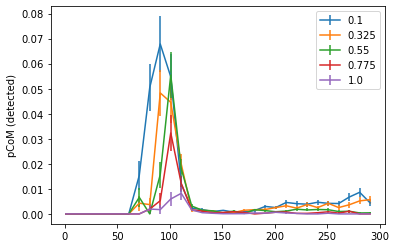

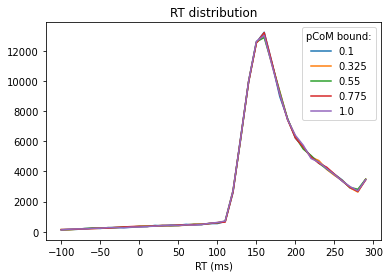

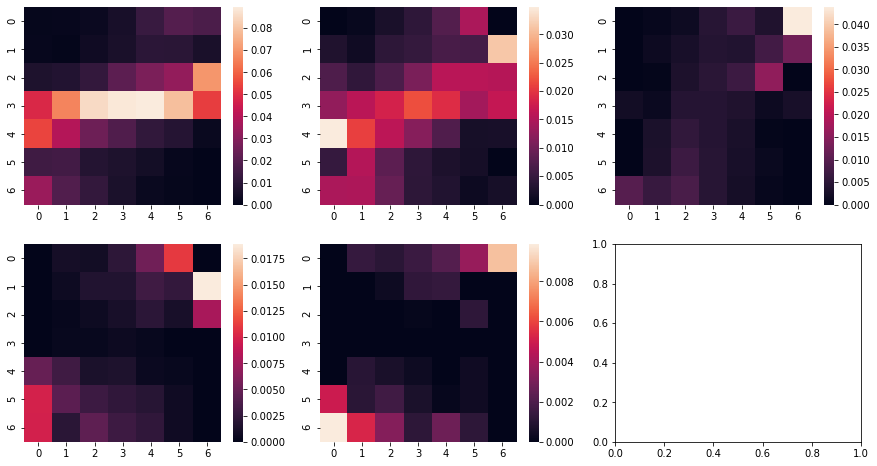

In [5]:
p_t_aff = 8
p_t_eff = 8
p_t_a = 42
p_w_zt = 0.17
p_w_stim = 0.12
p_w_a = 0.01
p_a_noise = 0.05
p_w_updt = 2
p_e_noise = 0.05
p_com_bound_list = np.linspace(0.1, 1, num=5)
stim_temp = np.concatenate((stim, np.zeros((p_t_aff+p_t_eff, stim.shape[1]))))
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_com_bound in enumerate(p_com_bound_list):
    E, A, com, first_ind, second_ind, resp_first, resp_fin, pro_vs_re,\
                    matrix, total_traj, init_trajs, final_trajs, motor_updt_time,\
                    x_val_at_updt, tr_indx_for_coms, xpos_plot, median_pcom,\
                    rt_vals, rt_bins =\
                    exddm.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                        MT_slope=MT_slope, MT_intercep=MT_intercep,
                                        p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                        p_e_noise=p_e_noise, p_com_bound=p_com_bound,
                                        p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                        num_tr=num_tr, p_w_a=p_w_a,
                                        p_a_noise=p_a_noise, p_w_updt=p_w_updt,
                                        compute_trajectories=compute_trajectories,
                                        stim_res=stim_res)
#     hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
#     print(len(first_ind))
#     print(len(com))
#     print(len(resp_first))
#     print(len(resp_fin))
#     print(len(coh))
#     print(len(pro_vs_re))
#     print(len(detected_com))
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff+p_t_aff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_com_bound, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_com_bound, 4)}')
#     plt.figure()
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='pCoM bound:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM (detected)')

#### Now, changing stimulus weight (p_w_stim), setting p_com_bound to 0.5

Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories


Text(0, 0.5, 'pCoM')

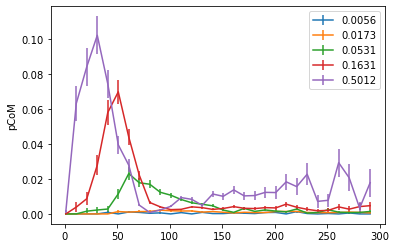

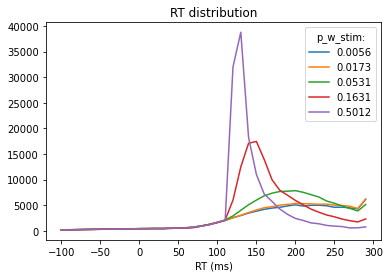

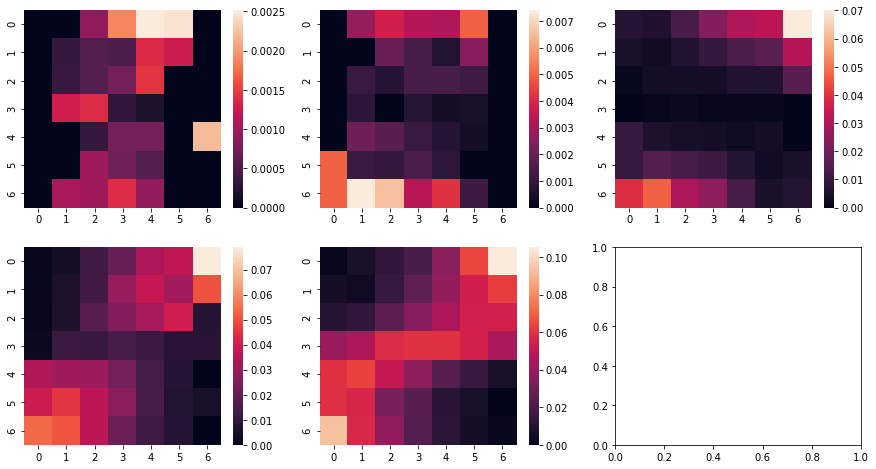

In [6]:
p_t_aff = 8
p_t_eff = 8
p_t_a = 42
p_w_zt = 0.18824
p_e_noise = 0.05092263
p_w_a = 0.01576225
p_a_noise = 0.0585686
p_w_updt = 1.056665
p_com_bound = 0.5
p_w_stim_list = np.logspace(-2.25, -0.3, num=5)
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_w_stim in enumerate(p_w_stim_list):
    E, A, com, first_ind, second_ind, resp_first, resp_fin, pro_vs_re,\
                    matrix, total_traj, init_trajs, final_trajs, motor_updt_time,\
                    x_val_at_updt, tr_indx_for_coms, xpos_plot, median_pcom,\
                    rt_vals, rt_bins =\
                    exddm.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                        MT_slope=MT_slope, MT_intercep=MT_intercep,
                                        p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                        p_e_noise=p_e_noise, p_com_bound=p_com_bound,
                                        p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                        num_tr=num_tr, p_w_a=p_w_a,
                                        p_a_noise=p_a_noise, p_w_updt=p_w_updt,
                                        compute_trajectories=compute_trajectories,
                                        stim_res=stim_res)
#     hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_w_stim, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_w_stim, 4)}')
#     plt.figure()
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_w_stim:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM')

#### Now, changing prior weight (p_w_zt), setting p_w_stim to 0.04

Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories


Text(0, 0.5, 'pCoM')

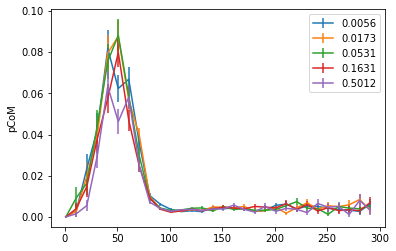

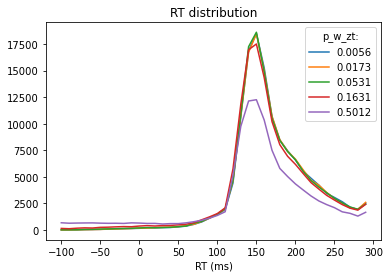

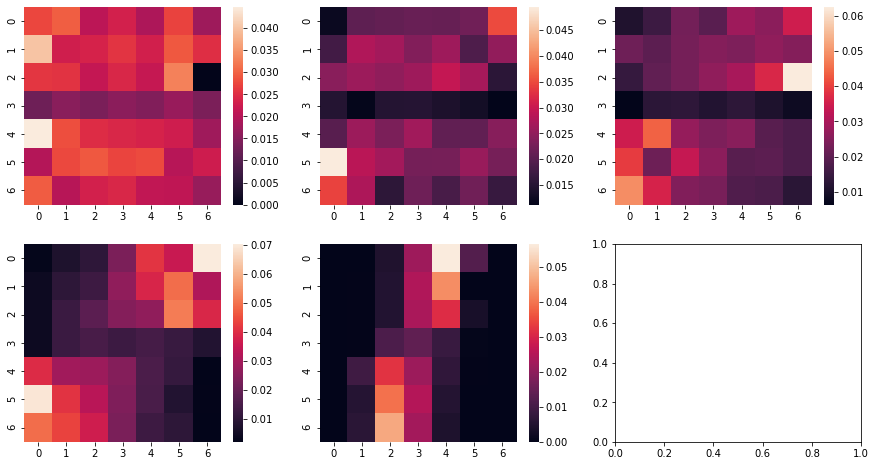

In [7]:
p_t_aff = 8
p_t_eff = 8
p_t_a = 42
p_w_stim = 0.16
p_e_noise = 0.05092263
p_w_a = 0.01576225
p_a_noise = 0.0585686
p_w_updt = 1.056665
p_com_bound = 0.5 
p_w_zt_list = np.logspace(-2.25, -0.3, num=5)
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_w_zt in enumerate(p_w_zt_list):
    E, A, com, first_ind, second_ind, resp_first, resp_fin, pro_vs_re,\
                    matrix, total_traj, init_trajs, final_trajs, motor_updt_time,\
                    x_val_at_updt, tr_indx_for_coms, xpos_plot, median_pcom,\
                    rt_vals, rt_bins =\
                    exddm.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                        MT_slope=MT_slope, MT_intercep=MT_intercep,
                                        p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                        p_e_noise=p_e_noise, p_com_bound=p_com_bound,
                                        p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                        num_tr=num_tr, p_w_a=p_w_a,
                                        p_a_noise=p_a_noise, p_w_updt=p_w_updt,
                                        compute_trajectories=compute_trajectories,
                                        stim_res=stim_res)
#     hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_w_zt, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_w_zt, 4)}')
#     plt.figure()
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_w_zt:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM')

range of RTs

#### Now, changing e noise (p_e_noise), setting p_w_zt to 0.15

Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories


Text(0, 0.5, 'pCoM')

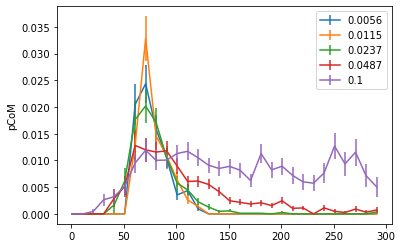

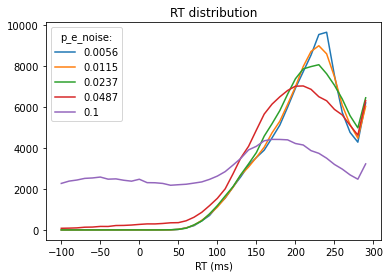

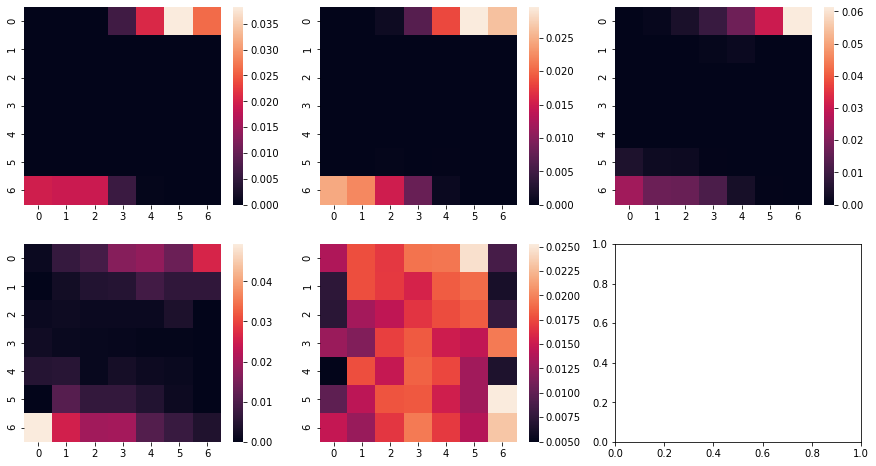

In [8]:
p_t_aff = 8
p_t_eff = 8
p_t_a = 42
p_w_stim = 0.04
p_w_zt = 0.15
p_w_a = 0.01576225
p_a_noise = 0.0585686
p_w_updt = 1.056665
p_com_bound = 0.5
p_e_noise_list = np.logspace(-2.25, -1, num=5)
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_e_noise in enumerate(p_e_noise_list):
    E, A, com, first_ind, second_ind, resp_first, resp_fin, pro_vs_re,\
                    matrix, total_traj, init_trajs, final_trajs, motor_updt_time,\
                    x_val_at_updt, tr_indx_for_coms, xpos_plot, median_pcom,\
                    rt_vals, rt_bins =\
                    exddm.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                        MT_slope=MT_slope, MT_intercep=MT_intercep,
                                        p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                        p_e_noise=p_e_noise, p_com_bound=p_com_bound,
                                        p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                        num_tr=num_tr, p_w_a=p_w_a,
                                        p_a_noise=p_a_noise, p_w_updt=p_w_updt,
                                        compute_trajectories=compute_trajectories,
                                        stim_res=stim_res)
#     hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_e_noise, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_e_noise, 4)}')
#     plt.figure()
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_e_noise:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM')

#### Now, changing a noise (p_a_noise), setting p_e_noise to 0.015

Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories


Text(0, 0.5, 'pCoM (detected)')

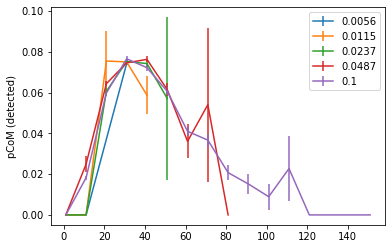

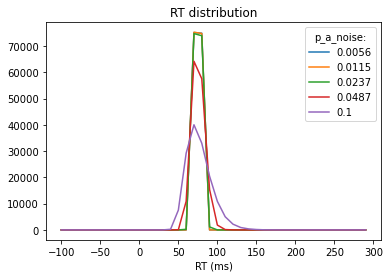

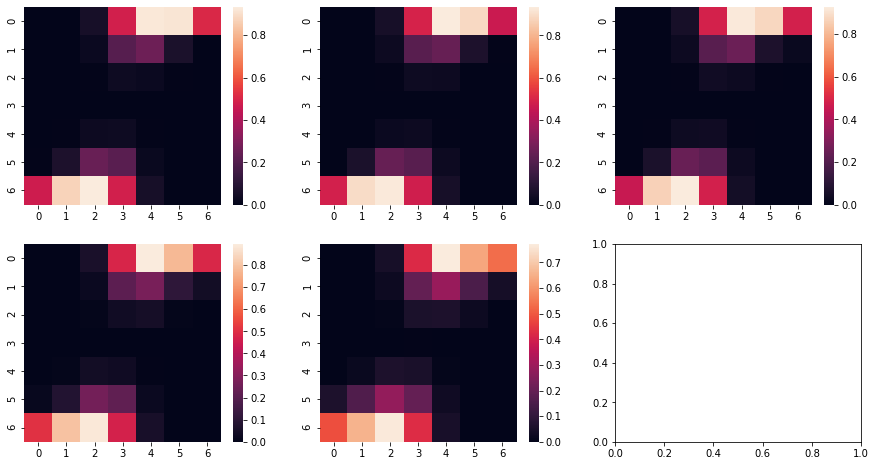

In [9]:
p_t_aff = 8
p_t_eff = 8
p_t_a = 50
p_w_stim = 0.15
p_w_zt = 0.2
p_w_a = 0.1
p_e_noise = 0.015
p_w_updt = 1.056665
p_com_bound = 0.5
p_a_noise_list = np.logspace(-2.25, -1, num=5)
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_a_noise in enumerate(p_a_noise_list):
    E, A, com, first_ind, second_ind, resp_first, resp_fin, pro_vs_re,\
                    matrix, total_traj, init_trajs, final_trajs, motor_updt_time,\
                    x_val_at_updt, tr_indx_for_coms, xpos_plot, median_pcom,\
                    rt_vals, rt_bins =\
                    exddm.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                        MT_slope=MT_slope, MT_intercep=MT_intercep,
                                        p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                        p_e_noise=p_e_noise, p_com_bound=p_com_bound,
                                        p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                        num_tr=num_tr, p_w_a=p_w_a,
                                        p_a_noise=p_a_noise, p_w_updt=p_w_updt,
                                        compute_trajectories=compute_trajectories,
                                        stim_res=stim_res)
#     hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_a_noise, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_a_noise, 4)}')
#     plt.figure()
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_a_noise:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM (detected)')

#### Now changing p_t_a

Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories


Text(0, 0.5, 'pCoM (detected)')

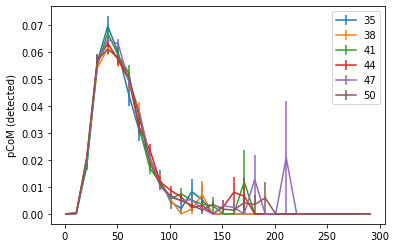

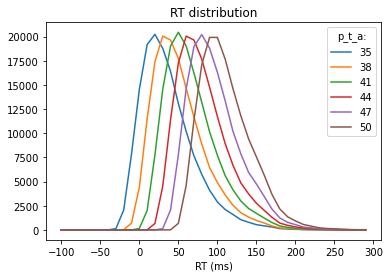

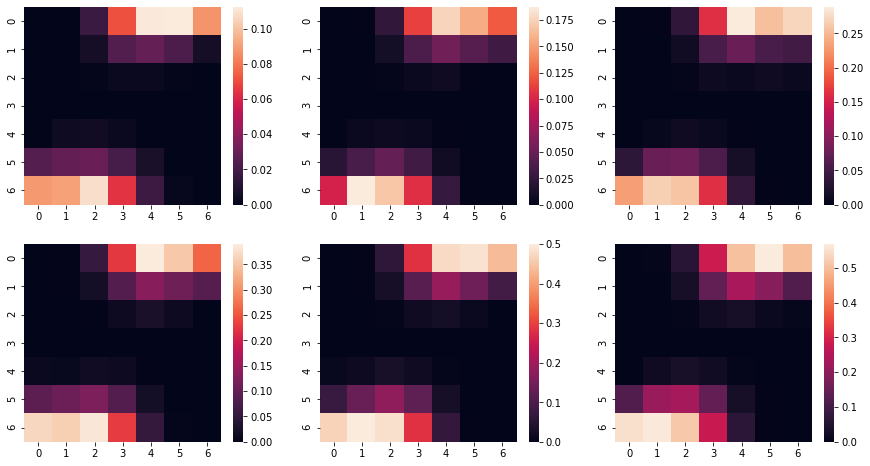

In [10]:
p_t_aff = 8
p_t_eff = 8
p_t_a_list = np.linspace(35, 50, num=6, dtype=int)
p_w_stim = 0.1
p_w_zt = 0.15
p_w_a = 0.06
p_e_noise = 0.015
p_w_updt = 1.056665
p_com_bound = 0.5
p_a_noise = 0.1
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_t_a in enumerate(p_t_a_list):
    E, A, com, first_ind, second_ind, resp_first, resp_fin, pro_vs_re,\
                    matrix, total_traj, init_trajs, final_trajs, motor_updt_time,\
                    x_val_at_updt, tr_indx_for_coms, xpos_plot, median_pcom,\
                    rt_vals, rt_bins =\
                    exddm.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                        MT_slope=MT_slope, MT_intercep=MT_intercep,
                                        p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                        p_e_noise=p_e_noise, p_com_bound=p_com_bound,
                                        p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                        num_tr=num_tr, p_w_a=p_w_a,
                                        p_a_noise=p_a_noise, p_w_updt=p_w_updt,
                                        compute_trajectories=compute_trajectories,
                                        stim_res=stim_res)
#     hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_t_a, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_t_a, 4)}')
#     plt.figure()
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_t_a:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM (detected)')

#### Now changing p_t_eff

Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories


Text(0, 0.5, 'pCoM (detected)')

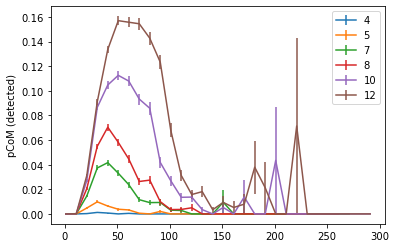

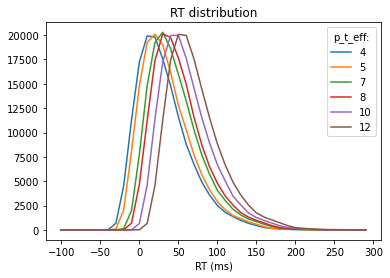

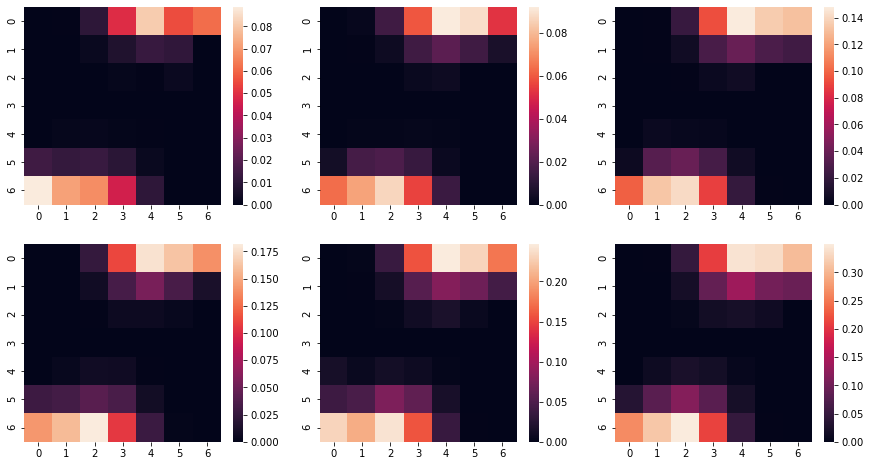

In [11]:
p_t_aff = 8
p_t_a = 38
p_t_eff_list = np.linspace(4, 12, num=6, dtype=int)
p_w_stim = 0.1
p_w_zt = 0.15
p_w_a = 0.06
p_e_noise = 0.015
p_w_updt = 1.056665
p_com_bound = 0.5
p_a_noise = 0.1
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_t_eff in enumerate(p_t_eff_list):
    E, A, com, first_ind, second_ind, resp_first, resp_fin, pro_vs_re,\
                    matrix, total_traj, init_trajs, final_trajs, motor_updt_time,\
                    x_val_at_updt, tr_indx_for_coms, xpos_plot, median_pcom,\
                    rt_vals, rt_bins =\
                    exddm.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                        MT_slope=MT_slope, MT_intercep=MT_intercep,
                                        p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                        p_e_noise=p_e_noise, p_com_bound=p_com_bound,
                                        p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                        num_tr=num_tr, p_w_a=p_w_a,
                                        p_a_noise=p_a_noise, p_w_updt=p_w_updt,
                                        compute_trajectories=compute_trajectories,
                                        stim_res=stim_res)
#     hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_t_eff, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_t_eff, 4)}')
#     plt.figure()
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_t_eff:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM (detected)')

#### Now changing p_t_aff

Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories
Starting simulation, PSIAM


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting with trajectories


Text(0, 0.5, 'pCoM (detected)')

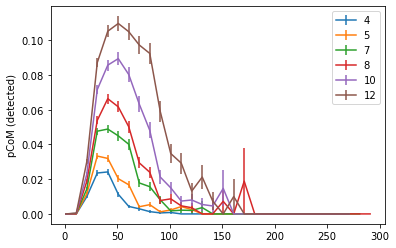

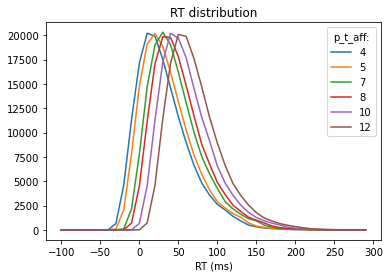

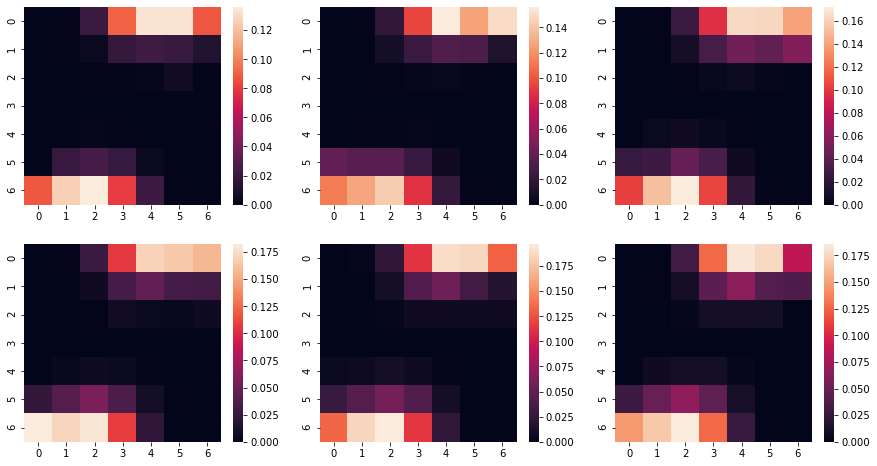

In [12]:
p_t_eff = 8
p_t_a = 38
p_t_aff_list = np.linspace(4, 12, num=6, dtype=int)
p_w_stim = 0.1
p_w_zt = 0.15
p_w_a = 0.06
p_e_noise = 0.015
p_w_updt = 1.056665
p_com_bound = 0.5
p_a_noise = 0.1
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_t_aff in enumerate(p_t_aff_list):
    E, A, com, first_ind, second_ind, resp_first, resp_fin, pro_vs_re,\
                    matrix, total_traj, init_trajs, final_trajs, motor_updt_time,\
                    x_val_at_updt, tr_indx_for_coms, xpos_plot, median_pcom,\
                    rt_vals, rt_bins =\
                    exddm.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                        MT_slope=MT_slope, MT_intercep=MT_intercep,
                                        p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                        p_e_noise=p_e_noise, p_com_bound=p_com_bound,
                                        p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                        num_tr=num_tr, p_w_a=p_w_a,
                                        p_a_noise=p_a_noise, p_w_updt=p_w_updt,
                                        compute_trajectories=compute_trajectories,
                                        stim_res=stim_res)
#     hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_t_aff, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_t_aff, 4)}')
#     plt.figure()
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_t_aff:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM (detected)')

#### Now with p_t_updt

Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories
Starting simulation, PSIAM
Starting with trajectories


C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexg\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting simulation, PSIAM
Starting with trajectories


Text(0, 0.5, 'pCoM (detected)')

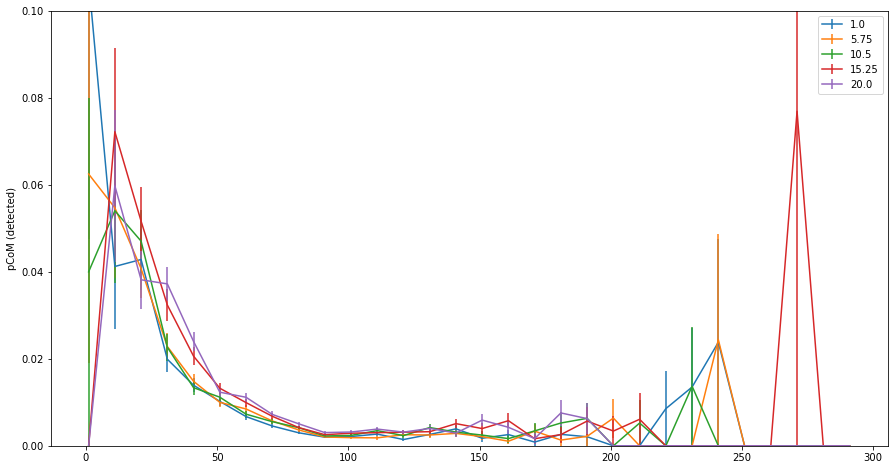

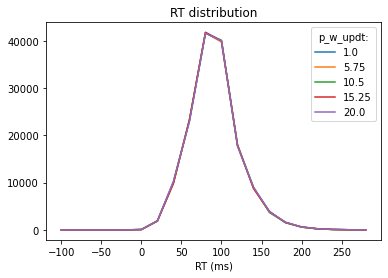

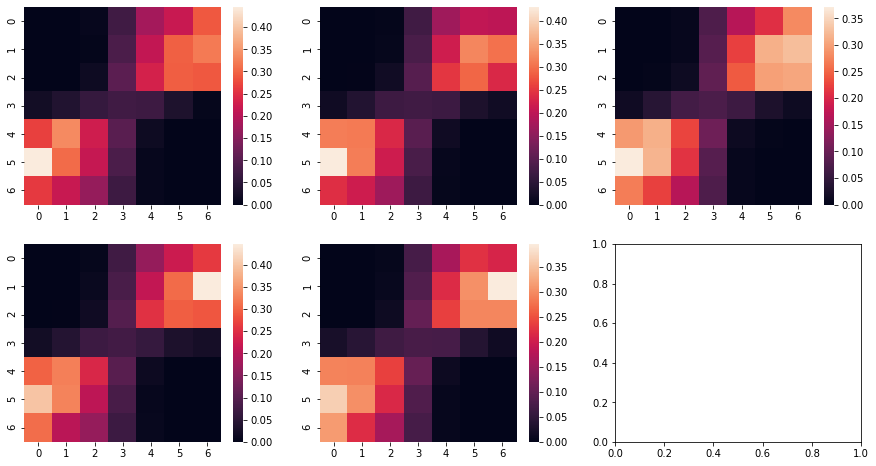

In [9]:
p_t_aff = 8
p_t_eff = 6
p_t_a = 42
p_w_zt = 0.15
p_w_stim = 0.15
p_e_noise = 0.01
p_com_bound = 0.2
p_w_a = 0.03
p_a_noise = 0.04
p_w_updt_list = np.linspace(1, 20, num=5)
stim_temp = np.concatenate((stim, np.zeros((p_t_aff+p_t_eff, stim.shape[1]))))
fig, ax = plt.subplots(1, figsize=(15,8))
ax.set_ylim(0, 0.1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_w_updt in enumerate(p_w_updt_list):
    E, A, com, first_ind, second_ind, resp_first, resp_fin, pro_vs_re,\
                    matrix, total_traj, init_trajs, final_trajs, motor_updt_time,\
                    x_val_at_updt, tr_indx_for_coms, xpos_plot, median_pcom,\
                    rt_vals, rt_bins, _ =\
                    exddm.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                        MT_slope=MT_slope, MT_intercep=MT_intercep,
                                        p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                        p_e_noise=p_e_noise, p_com_bound=p_com_bound,
                                        p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                        num_tr=num_tr, p_w_a=p_w_a,
                                        p_a_noise=p_a_noise, p_w_updt=p_w_updt,
                                        compute_trajectories=compute_trajectories,
                                        stim_res=stim_res)
#     hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_w_updt, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_w_updt, 4)}')
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_w_updt:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM (detected)')

# For version 2
### Change parameters of update

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x000002030EA41F70>
Traceback (most recent call last):
  File "C:\Users\agarcia\anaconda3\lib\weakref.py", line 57, in _cb
KeyboardInterrupt: 


KeyboardInterrupt: 

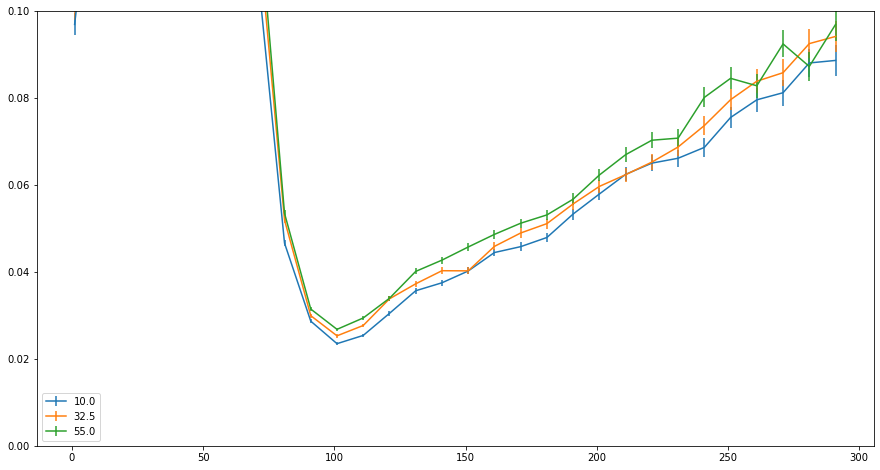

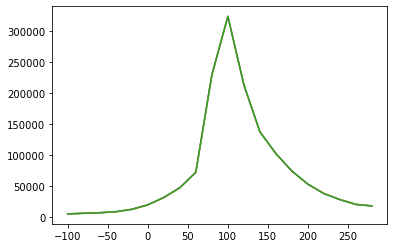

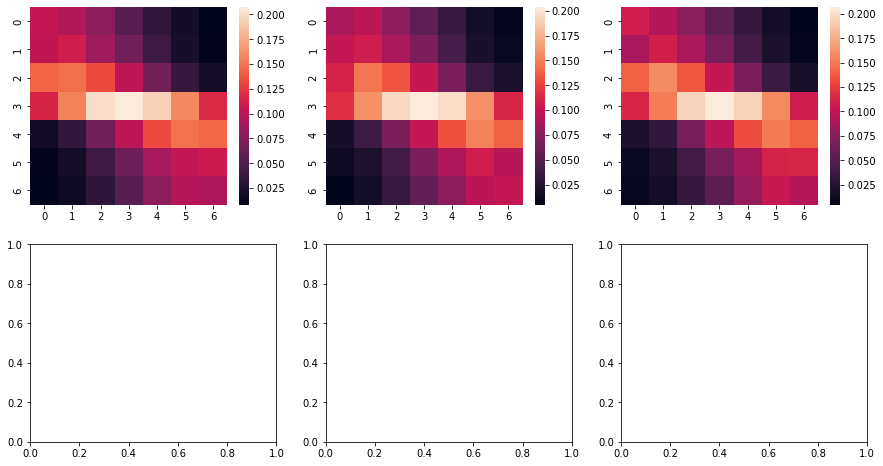

In [12]:
p_t_aff = 7
p_t_eff = 8
p_t_a = 15
p_w_zt = 0.2
p_w_stim = 0.15
p_e_noise = 0.05
p_com_th = 0.
p_w_a = 0.028
p_a_noise = np.sqrt(5e-3)
p_1st_readout = 60
p_2nd_readout = 5
p_1st_readout_list = np.linspace(10, 100, num=5)
stim_temp = np.concatenate((stim, np.zeros((p_t_aff+p_t_eff, stim.shape[1]))))
fig, ax = plt.subplots(1, figsize=(15,8))
ax.set_ylim(0, 0.1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_1st_readout in enumerate(p_1st_readout_list):
    E, A, com_model, first_ind, second_ind, resp_first, resp_fin,\
    pro_vs_re, matrix, total_traj, init_trajs, final_trajs,\
    frst_traj_motor_time, x_val_at_updt, xpos_plot, median_pcom,\
    rt_vals, rt_bins, tr_index  =\
        exddmv2.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                MT_slope=MT_slope, MT_intercep=MT_intercep,
                                p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                p_e_noise=p_e_noise, p_com_th=p_com_th,
                                p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                num_tr=num_tr, p_w_a=p_w_a, p_1st_readout=p_1st_readout,
                                p_2nd_readout=p_2nd_readout,
                                p_a_noise=p_a_noise,
                                compute_trajectories=compute_trajectories,
                                stim_res=stim_res)
    hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_1st_readout, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_1st_readout, 4)}')
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_1st_readout:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM (detected)')

In [1]:
p_t_aff = 7
p_t_eff = 8
p_t_a = 15
p_w_zt = 0.2
p_w_stim = 0.15
p_e_noise = 0.05
p_com_th = 0.
p_w_a = 0.028
p_a_noise = np.sqrt(5e-3)
p_1st_readout = 50
p_2nd_readout = 5
p_2nd_readout_list = np.linspace(10, 100, num=5)
stim_temp = np.concatenate((stim, np.zeros((p_t_aff+p_t_eff, stim.shape[1]))))
fig, ax = plt.subplots(1, figsize=(15,8))
ax.set_ylim(0, 0.1)
fig1, ax1 = plt.subplots(1)
fig_mat, ax_mat = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax_mat = ax_mat.flatten()
for i_ax, p_2nd_readout in enumerate(p_2nd_readout_list):
    E, A, com_model, first_ind, second_ind, resp_first, resp_fin,\
    pro_vs_re, matrix, total_traj, init_trajs, final_trajs,\
    frst_traj_motor_time, x_val_at_updt, xpos_plot, median_pcom,\
    rt_vals, rt_bins, tr_index  =\
        exddmv2.trial_ev_vectorized(zt=zt, stim=stim_temp, coh=coh,
                                MT_slope=MT_slope, MT_intercep=MT_intercep,
                                p_w_zt=p_w_zt, p_w_stim=p_w_stim,
                                p_e_noise=p_e_noise, p_com_th=p_com_th,
                                p_t_aff=p_t_aff, p_t_eff=p_t_eff, p_t_a=p_t_a,
                                num_tr=num_tr, p_w_a=p_w_a, p_1st_readout=p_1st_readout,
                                p_2nd_readout=p_2nd_readout,
                                p_a_noise=p_a_noise,
                                compute_trajectories=compute_trajectories,
                                stim_res=stim_res)
    hits = resp_fin == gt
    detected_com = np.abs(x_val_at_updt) > detect_CoMs_th
    data_to_plot = {'sound_len': (first_ind-fixation+p_t_eff)*stim_res, 'CoM': com,
                    'first_resp': resp_first, 'final_resp': resp_fin,
                    'avtrapz': coh,
                    'pro_vs_re': pro_vs_re,
                    'detected_com': detected_com}
    df_plot = pd.DataFrame(data_to_plot)
    binned_curve(df_plot, 'detected_com', 'sound_len', bins=BINS, ax=ax,
                 xpos=10, errorbar_kw={'label': f'{round(p_2nd_readout, 4)}'})
    ax1.plot(rt_bins[:-1], rt_vals, label=f'{round(p_2nd_readout, 4)}')
    sns.heatmap(matrix, ax=ax_mat[i_ax])
ax1.set_title('RT distribution')
ax1.legend(title='p_1st_readout:')
ax1.set_xlabel('RT (ms)')
ax.set_ylabel('pCoM (detected)')

NameError: name 'np' is not defined